## 2D Isotropic Quantum Harmonic Oscillator - Dynamic Simulation
### Case 2.3 - Expansion of Polar into Cartesian Eigenstates

<br>
Static simulation of the expansion of polar eigenstate $\psi_{2}^{1}(r,\theta)$ into cartesian eigenstates $\psi_{n_x,n_y}(x,y)$ that satisfy the condition $q = 2n + |m| = n_x + n_y$ .

This notebook contains graphs of:
* polar eigenstate $\psi_{2}^{1}(r,\theta)$ ,
* the expansion into cartesian eigenstates $\psi_{n_x,n_y}(x,y)$ .


#### Import libraries and functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import qho_eigen as qho
from math_tools import *


#### Initialize polar eigenstate $\psi_{2}^{1}(r,\theta)$


In [2]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
r_min = 0
r_max = 4 * math.sqrt(2)
r_N = 501
r = np.linspace(r_min, r_max, r_N)

theta_min = 0
theta_max = 2 * math.pi
theta_N = 501
theta = np.linspace(theta_min, theta_max, theta_N)

R, THETA = np.meshgrid(r, theta)
X, Y = pol2cart(R, THETA)

# Compute polar eigenstate
n = 2
m = 1
psi_pol = qho.eigen2D_pol(s, n, m, R, THETA)


C:\Users\User\AppData\Local\Temp\ipykernel_16004\1337632052.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X, Y, abs2(psi_pol), cmap='inferno', vmin=0)


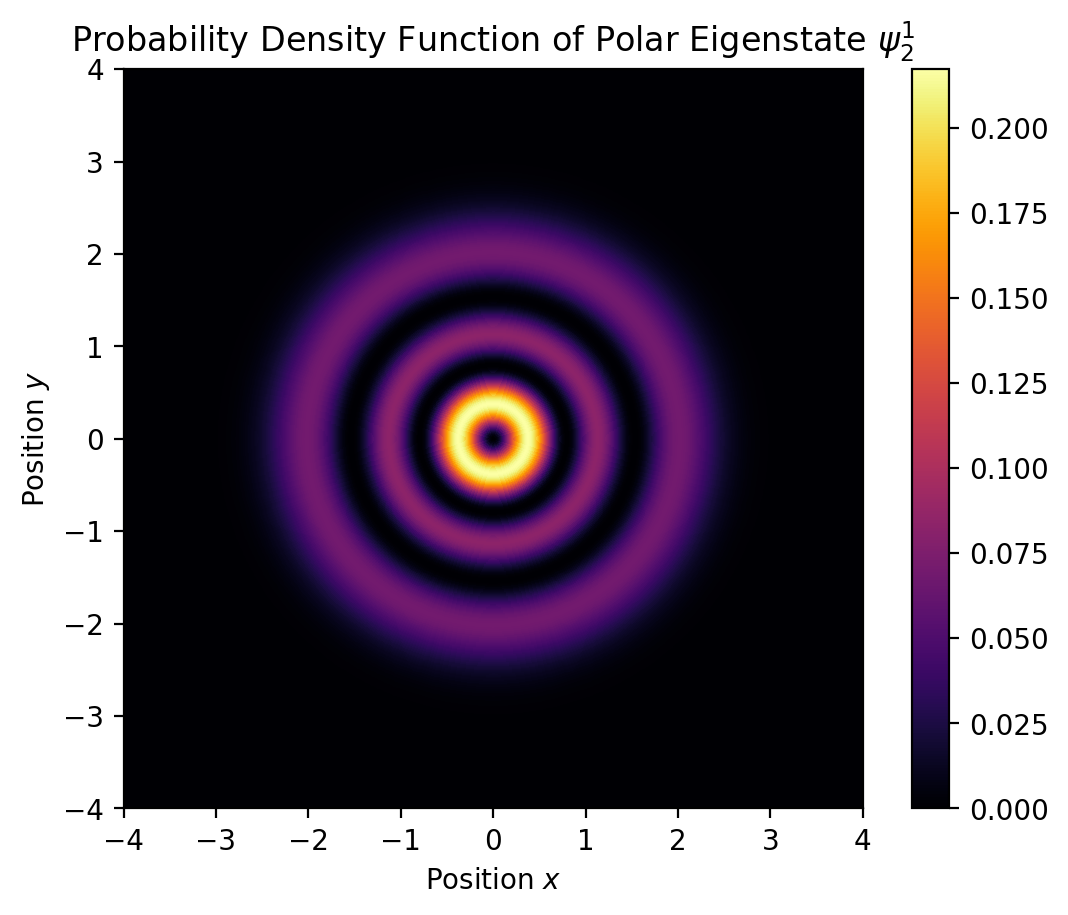

In [27]:
# Plot probability density function of polar eigenstate
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X, Y, abs2(psi_pol), cmap='inferno', vmin=0)
ax.set_title(rf'Probability Density Function of Polar Eigenstate $\psi_{n}^{m}$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(np.array([-r_max, r_max]) / math.sqrt(2)), ax.set_ylim(np.array([-r_max, r_max]) / math.sqrt(2))
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Expand into cartesian eigenstates $\psi_{n_x,n_y}(x,y)$


In [35]:
# Compute cartesian eigenstates
N_cart = 6
nx = np.vstack(np.arange(6), dtype=object)
ny = np.vstack(np.arange(5,-1,-1), dtype=object)
eigenfuns_cart = np.zeros((N_cart, np.size(theta), np.size(r)))

for i in range(N_cart):
    eigenfuns_cart[i] = qho.eigen2D_cart(s, nx[i][0], ny[i][0], X, Y)

# Compute expansion coefficients
c = np.vstack(np.zeros((N_cart, 1)), dtype=np.complex128)

for i in range(N_cart):
    c[i] = np.trapz(np.trapz(np.conjugate(eigenfuns_cart[i]) * psi_pol * R, x=r), x=theta)

print('Expansion coefficients')
for i in range(N_cart): print(f'nx {nx[i][0]}, ny {ny[i][0]} -> {c[i][0]:.6f}')
print()

# Reconstruct polar eigenstate
psi_cart = np.sum(c[:, np.newaxis] * eigenfuns_cart, axis=0)

# Compute absolute error of cartesian expansion
print(f'Max abs error of cartesian expansion = {np.max(np.abs(abs2(psi_pol) - abs2(psi_cart)))}')
print()


Expansion coefficients
nx 0, ny 5 -> 0.000000+0.559017j
nx 1, ny 4 -> 0.250000+0.000000j
nx 2, ny 3 -> 0.000000+0.353553j
nx 3, ny 2 -> 0.353553+0.000000j
nx 4, ny 1 -> 0.000000+0.250000j
nx 5, ny 0 -> 0.559017+0.000000j

Max abs error of cartesian expansion = 1.4237260259619688e-09



C:\Users\User\AppData\Local\Temp\ipykernel_16004\4177214546.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X, Y, abs2(psi_cart), cmap='inferno', vmin=0)


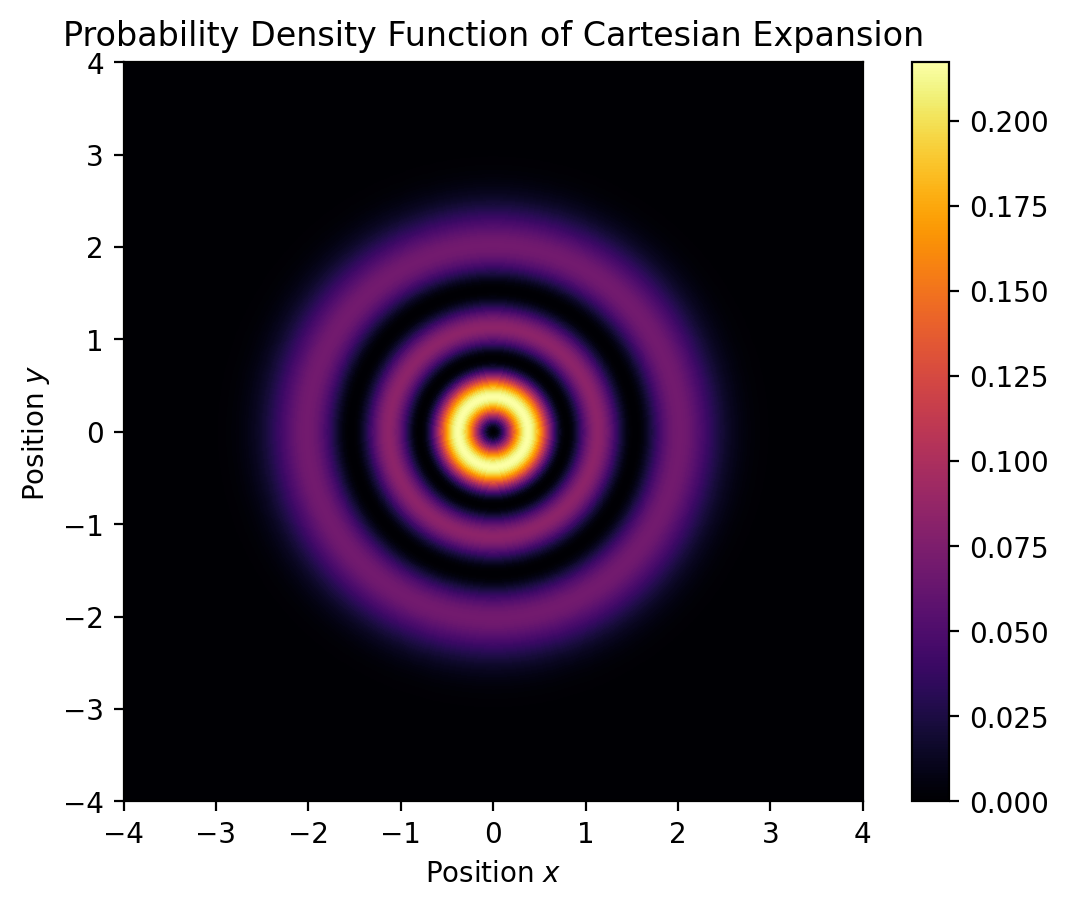

In [26]:
# Plot probability density function of cartesian expansion
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X, Y, abs2(psi_cart), cmap='inferno', vmin=0)
ax.set_title(r'Probability Density Function of Cartesian Expansion')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(np.array([-r_max, r_max]) / math.sqrt(2)), ax.set_ylim(np.array([-r_max, r_max]) / math.sqrt(2))
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()
